In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from dengo import chemical_network
from dengo.chemical_network import \
    ChemicalNetwork, \
    reaction_registry, \
    cooling_registry, species_registry
import dengo.primordial_rates, dengo.primordial_cooling
from dengo.get_rates import setup_umist_species, setup_umist_reactions

 using cli
 using CLI for selections


In [8]:
import csv, os

periodic_table_by_name = {}
periodic_table_by_number = {}

dengo_path = '../dengo/'
fn = os.path.join(os.path.dirname(dengo_path),
                  "periodictabledump.csv")

with open(fn, "r") as csvfile:
    pt_reader = csv.reader(csvfile)
    for row in pt_reader:
        num = int(row[0])
        weight = float(row[1])
        full_name = row[2]
        symbol = row[3]
        periodic_table_by_name[symbol] = (num, weight, full_name)
        periodic_table_by_number[num] = (weight, symbol, full_name)

In [9]:
all_element = []
for i in periodic_table_by_name:
    all_element.append(i)

In [ ]:
s, c, r = setup_umist_reactions(added_species)
umist.add_collection(s, c, r)

In [10]:
import os
import re
import numpy
fname = '/home/kwoksun2/dengo/dengo-project-dengo-ed14369817a2/examples'

In [11]:
G = nx.MultiDiGraph()

fn = os.path.join(fname, "RATE12.txt")
for line in open(fn, "r"):
    rline = re.split(":?", line)

    ele = rline[2:6]
    for sp_down in ele[1:3]:
        if sp_down == "": continue
        for sp_up in ele[3:5]:
            if sp_up == "": continue
            G.add_edge(sp_down, sp_up )

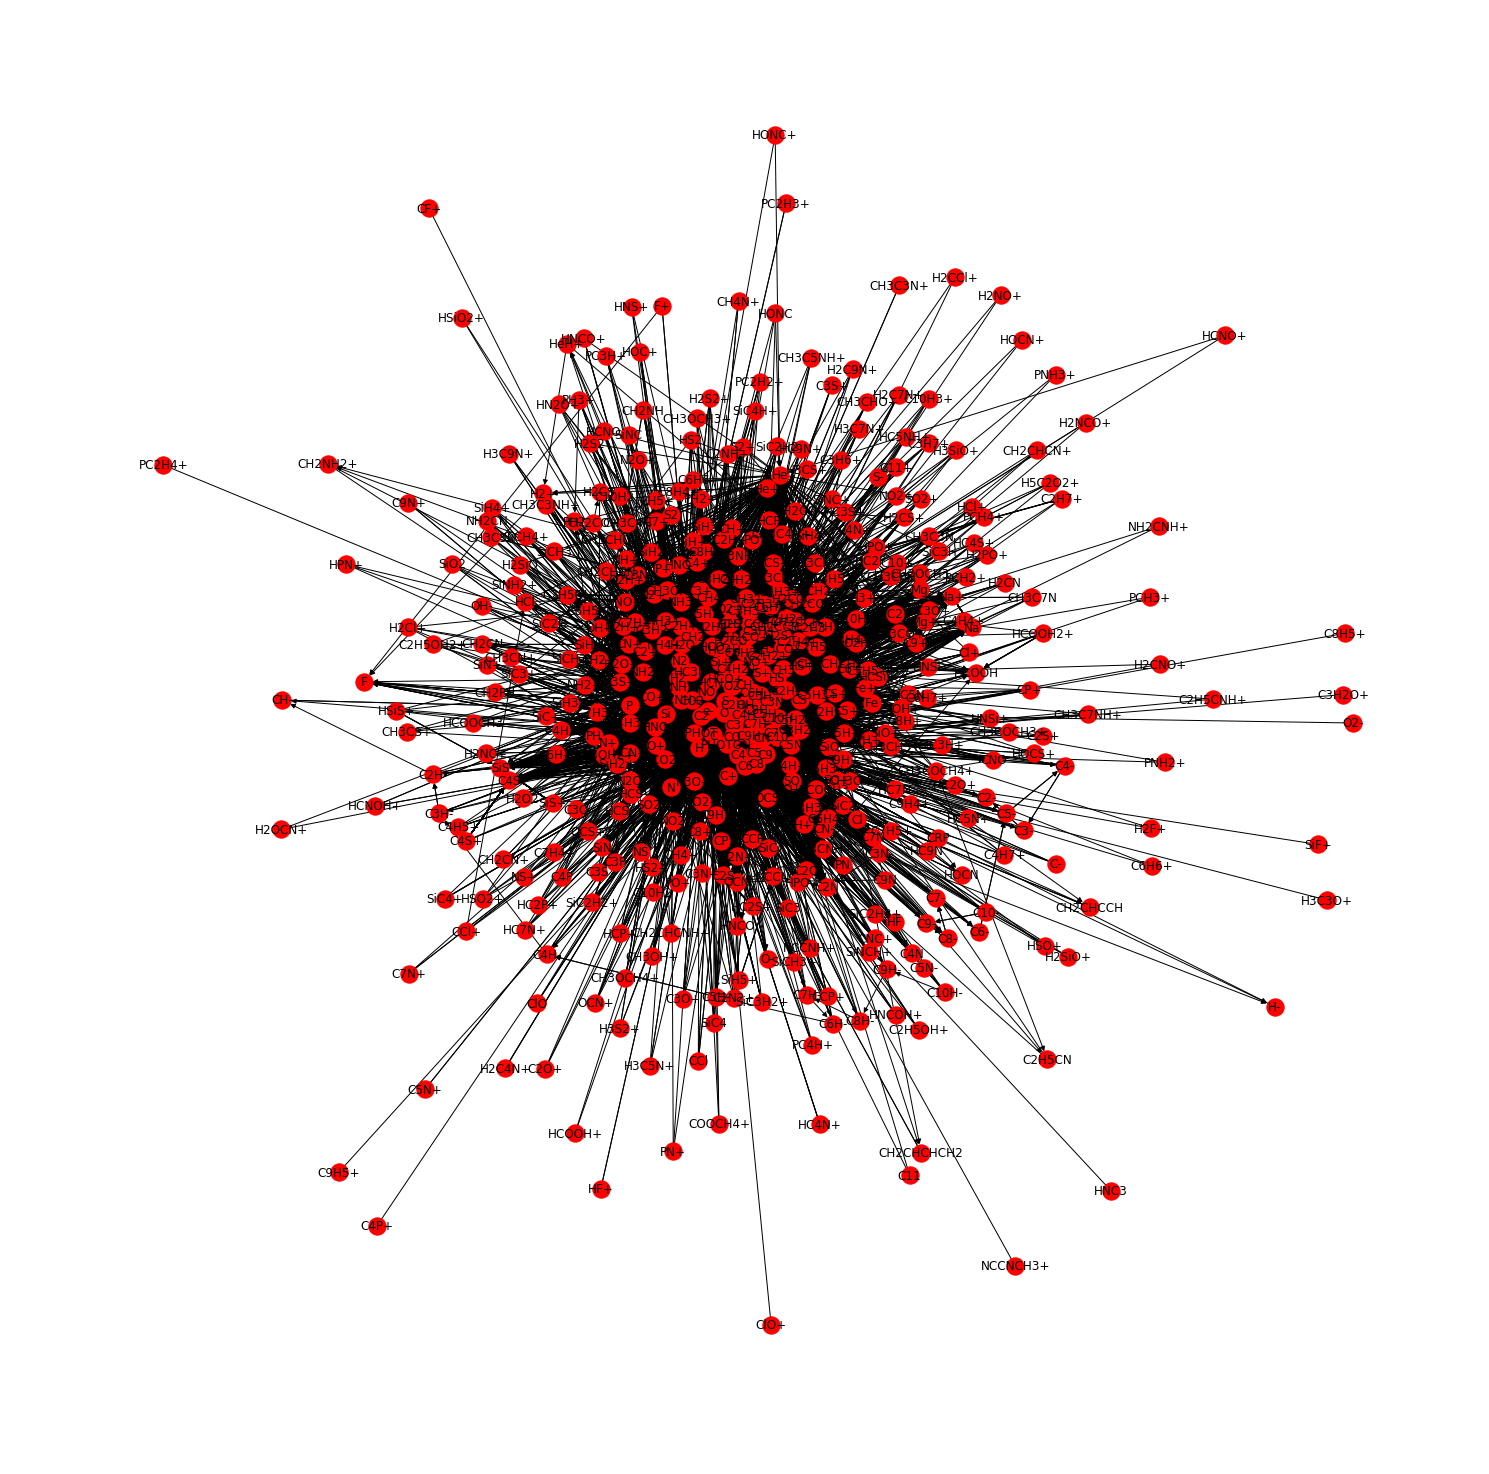

In [12]:
g = nx.spring_layout(G,k=5/numpy.sqrt(G.order()), iterations=200)
plt.figure(figsize=(20,20))
p = nx.draw(G,g, arrows=True,with_labels=True)

In [3]:
from dengo.chemical_network import \
    ChemicalNetwork, \
    reaction_registry, \
    cooling_registry
from dengo.primordial_rates import setup_primordial
import dengo.primordial_cooling
from dengo.ion_by_ion import setup_ionization
from dengo.chemistry_constants import tiny, kboltz, mh
import numpy as np
from matplotlib.pyplot import cm


ion_by_ion = ChemicalNetwork()
ion_by_ion.add_species("de")

all_elements = ["O", "C", "Si", "Mg", "N", "S", "He", "Ne", "H","Fe","de"]
color=cm.rainbow(np.linspace(0,1,len(all_elements) ))

for atom in all_elements:
    if atom != 'de':
        s, c, r = setup_ionization(atom)
        ion_by_ion.add_collection(s, c, r)

Adding reaction: O_9_r : 1*O_9 + 1*de => 1*O_8
Adding reaction: O_7_r : 1*O_7 + 1*de => 1*O_6
Adding reaction: O_4_i : 1*O_4 + 1*de => 1*O_5 + 2*de
Adding reaction: O_8_r : 1*O_8 + 1*de => 1*O_7
Adding reaction: O_4_r : 1*O_4 + 1*de => 1*O_3
Adding reaction: O_6_r : 1*O_6 + 1*de => 1*O_5
Adding reaction: O_3_r : 1*O_3 + 1*de => 1*O_2
Adding reaction: O_5_i : 1*O_5 + 1*de => 1*O_6 + 2*de
Adding reaction: O_6_i : 1*O_6 + 1*de => 1*O_7 + 2*de
Adding reaction: O_1_i : 1*O_1 + 1*de => 1*O_2 + 2*de
Adding reaction: O_8_i : 1*O_8 + 1*de => 1*O_9 + 2*de
Adding reaction: O_2_r : 1*O_2 + 1*de => 1*O_1
Adding reaction: O_7_i : 1*O_7 + 1*de => 1*O_8 + 2*de
Adding reaction: O_2_i : 1*O_2 + 1*de => 1*O_3 + 2*de
Adding reaction: O_3_i : 1*O_3 + 1*de => 1*O_4 + 2*de
Adding reaction: O_5_r : 1*O_5 + 1*de => 1*O_4
Adding reaction: C_4_r : 1*C_4 + 1*de => 1*C_3
Adding reaction: C_2_i : 1*C_2 + 1*de => 1*C_3 + 2*de
Adding reaction: C_5_i : 1*C_5 + 1*de => 1*C_6 + 2*de
Adding reaction: C_6_i : 1*C_6 + 1*de

In [4]:
G = nx.MultiDiGraph()

for reaction in ion_by_ion.reactions:
    r = ion_by_ion.reactions[reaction]
    down_species  = r.down_species
    up_species  = r.up_species    
    for d_sp in down_species:
        for u_sp in up_species:
            dname = d_sp.name
            uname = u_sp.name
            
            nd = dname
            nu = uname
            cd = ""
            cu = ""
            
            
            G.add_node(nd+cd)
            G.add_node(nu+cu)
            
#             try:
#                 nd, c = dname.split('_')
#                 cd = write_roman(int(c))
#             except:
#                 nd = dname
#                 cd = ""
#             try:
#                 nu, cu = uname.split('_')
#                 cu = write_roman(int(c))
#             except:
#                 nu = uname
#                 cu = ""
            G.add_edge( nd+cd , nu+cu )


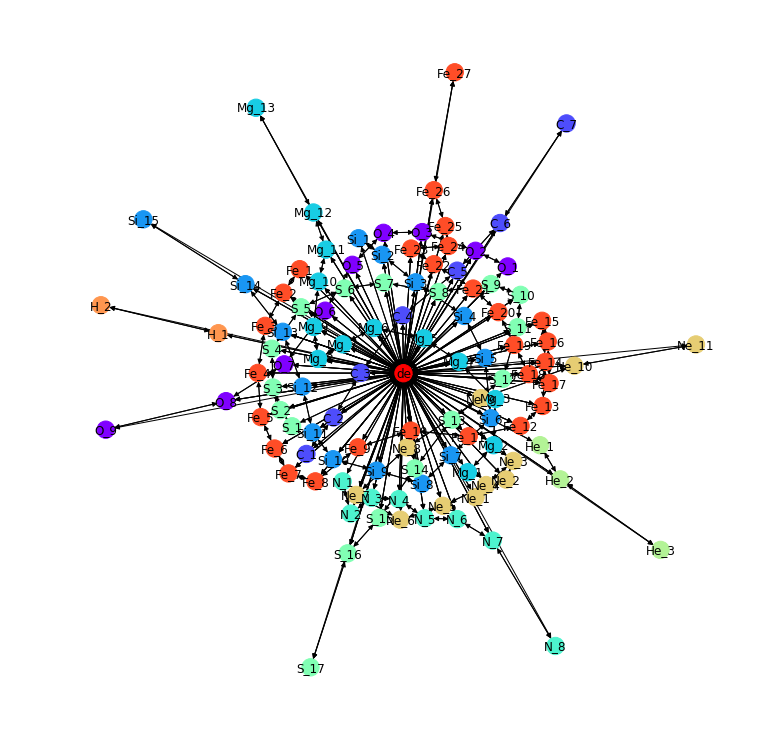

In [5]:
    
from matplotlib.pyplot import cm

ele_to_color = {}

for i, ele in enumerate(all_elements):
        ele_to_color[ele] = color[i]
color_map = []
for node in G:
        try:
            n, c = node.split('_')
        except:
            n = "de"
        color_map.append( ele_to_color[n] )
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
p = nx.draw(G, pos,node_color = color_map, with_labels=True, arrows=True)

In [ ]:
from collections import OrderedDict

def write_roman(num):

    roman = OrderedDict()
    roman[1000] = "M"
    roman[900] = "CM"
    roman[500] = "D"
    roman[400] = "CD"
    roman[100] = "C"
    roman[90] = "XC"
    roman[50] = "L"
    roman[40] = "XL"
    roman[10] = "X"
    roman[9] = "IX"
    roman[5] = "V"
    roman[4] = "IV"
    roman[1] = "I"

    def roman_num(num):
        for r in roman.keys():
            x, y = divmod(num, r)
            yield roman[r] * x
            num -= (r * x)
            if num > 0:
                roman_num(num)
            else:
                break
    return "".join([a for a in roman_num(num)])